<a href="https://colab.research.google.com/github/sainigauriyar/Tesla-Stock-Price-forecast/blob/main/Tesla_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet



In [ ]:
data=pd.read_csv('//content/TSLA (1).csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-26,650.969971,668.200012,647.109985,657.619995,657.619995,25336600
1,2021-07-27,663.400024,666.500000,627.239990,644.780029,644.780029,32813300
2,2021-07-28,647.000000,654.969971,639.400024,646.979980,646.979980,16006600
3,2021-07-29,649.789978,683.690002,648.799988,677.349976,677.349976,30394600
4,2021-07-30,671.760010,697.530029,669.000000,687.200012,687.200012,29656400


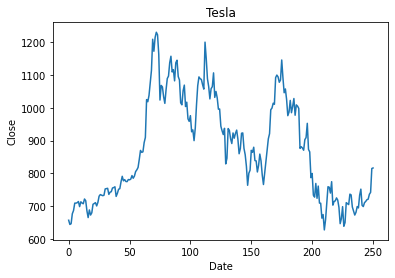

In [ ]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [ ]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [ ]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
611,2023-07-18,-76.717334,-467.655171,333.664297
612,2023-07-19,-75.666531,-464.613488,337.498599
613,2023-07-20,-83.790735,-484.308041,297.255337
614,2023-07-21,-89.641097,-480.638216,334.402201
615,2023-07-22,-70.892942,-465.410694,332.498309


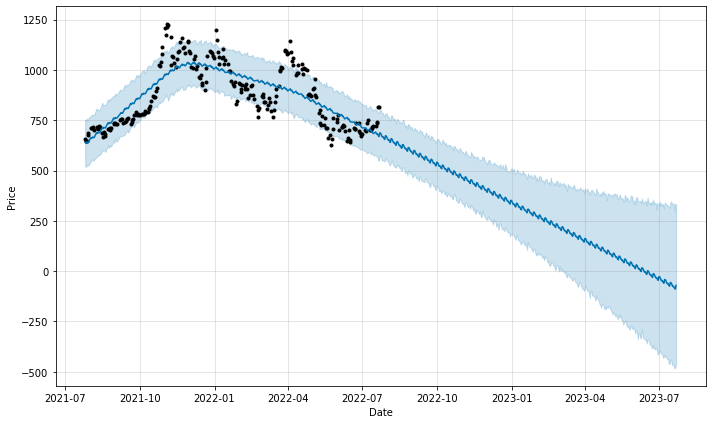

In [ ]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")